In [1]:
import yfinance as yf
import pandas as pd

## Data Collection

In [2]:
etfs = [
    'SPY', 'VGK', 'IEF', 'LQD', 'USO', 'GLD', 'VNQ', 'RWO', 'IWM', 'HYG', 'DBC'
]

data = yf.download(etfs, start='2010-01-01', end='2023-01-01')

adj_close = data['Adj Close']

print(adj_close.head())

adj_close.to_csv('historical_prices.csv')

[*********************100%%**********************]  11 of 11 completed

Ticker            DBC         GLD        HYG        IEF        IWM        LQD  \
Date                                                                            
2010-01-04  23.234583  109.800003  38.479965  65.948303  52.369205  62.557095   
2010-01-05  23.262199  109.699997  38.662544  66.237885  52.189140  62.855850   
2010-01-06  23.676441  111.510002  38.762501  65.970551  52.140030  62.670612   
2010-01-07  23.381868  110.820000  38.918980  65.970551  52.524746  62.748245   
2010-01-08  23.363457  111.370003  38.979824  66.052223  52.811222  62.885693   

Ticker            RWO        SPY         USO        VGK        VNQ  
Date                                                                
2010-01-04  18.773483  86.580750  322.160004  29.979458  25.190031  
2010-01-05  18.848783  86.809952  323.279999  29.931458  25.161755  
2010-01-06  18.732935  86.871048  327.760010  30.111477  25.116520  
2010-01-07  18.819832  87.237755  325.760010  29.919455  25.387928  
2010-01-08  18.790

In [3]:
# Normalize the adjusted close prices
normalized_prices = adj_close / adj_close.iloc[0]

# Display the normalized prices
normalized_prices.head()

Ticker,DBC,GLD,HYG,IEF,IWM,LQD,RWO,SPY,USO,VGK,VNQ
Date,,,,,,,,,,,
2010-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-05,1.001189,0.999089,1.004745,1.004391,0.996562,1.004776,1.004011,1.002647,1.003477,0.998399,0.998877
2010-01-06,1.019017,1.015574,1.007342,1.000337,0.995624,1.001815,0.997840,1.003353,1.017383,1.004404,0.997082
2010-01-07,1.006339,1.009290,1.011409,1.000337,1.002970,1.003056,1.002469,1.007588,1.011175,0.997999,1.007856
2010-01-08,1.005547,1.014299,1.012990,1.001576,1.008440,1.005253,1.000925,1.010941,1.016389,1.008006,1.000449


## Exploratory Data Analysis

NaN Values:
 Ticker
DBC    0
GLD    0
HYG    0
IEF    0
IWM    0
LQD    0
RWO    0
SPY    0
USO    0
VGK    0
VNQ    0
dtype: int64


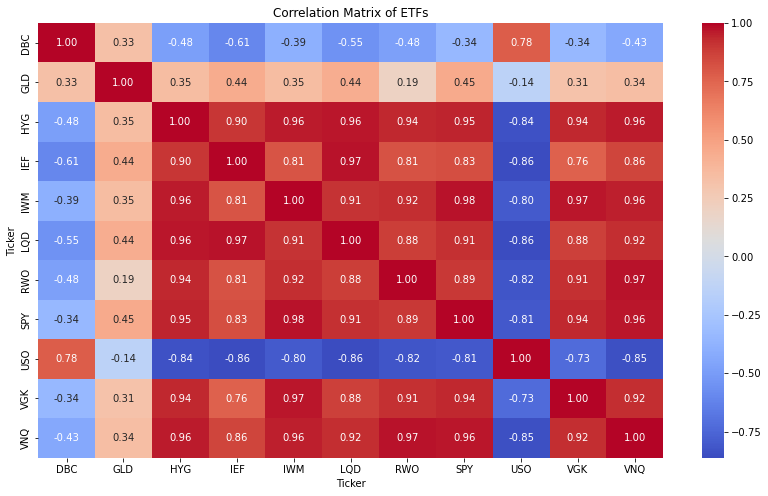

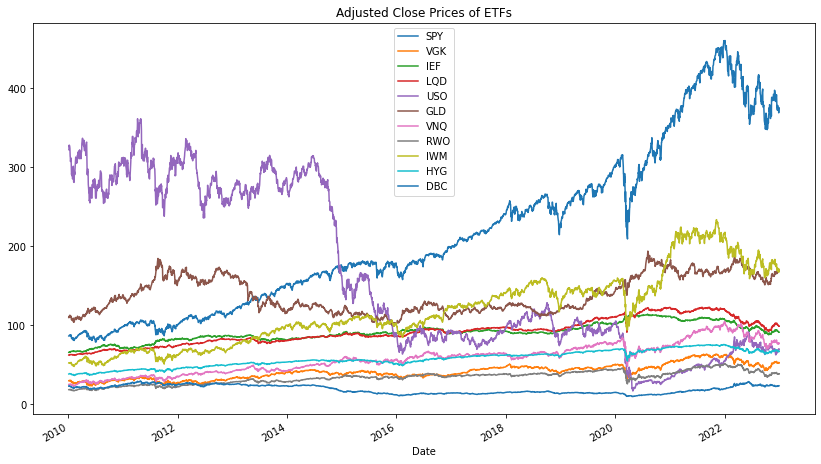

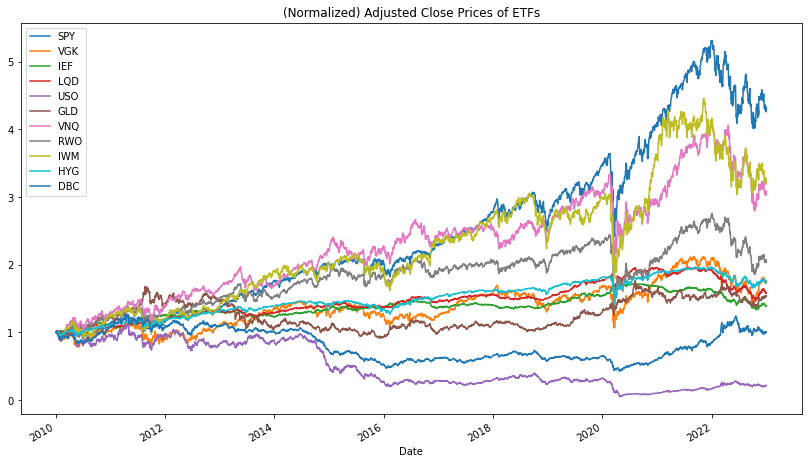

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = adj_close.describe()

# Missing values
missing_values = adj_close.isnull().sum()
print(f'NaN Values:\n {missing_values}')

# Correlation matrix
corr_matrix = adj_close.corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of ETFs')
plt.show()

# time series plot
plt.figure(figsize=(14, 8))
for etf in etfs:
    adj_close[etf].plot(label=etf)
plt.title('Adjusted Close Prices of ETFs')
plt.legend()
plt.show()

# normalized time series plot
plt.figure(figsize=(14, 8))
for etf in etfs:
    normalized_prices[etf].plot(label=etf)
plt.title('(Normalized) Adjusted Close Prices of ETFs')
plt.legend()
plt.show()